# Изучение закономерностей, определяющих успешность на рынке видеоигр.

### Описание проекта:

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Цель исследования - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.



## Содержание.

1. Общая инофрмация о данных.
2. Предобработка данных.
    * 2.1. Изменение типа данных.
    * 2.2. Заполнение пропусков.
    * 2.3. Добавление новых полей.
3. Анализ данных.
    * 3.1 Количество выпущенных игр по годам.
    * 3.2 Анализ изменения продаж по платформам.
    * 3.3 Зависимость отзывов и количества продаж.
        * 3.3.1 Отзывы критиков.
        * 3.3.2 Отзывы пользователей.
    * 3.5 Матрица корреляции.
    * 3.6 Исследование влияния жанра.
    * 3.7. Зависимость количества продаж и платформы.
    * 3.8 Самые популярные игры.
4. Портреты пользователей для каждого региона.
    * 4.1. Определение популярной платформы по регионам.
    * 4.2. Зависимость количества продаж от жанра.
    * 4.3 Зависимоть количества продаж от рейтинга критиков по регионам.
5. Проверка гипотез.
   * 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
   * 5.1 Средние пользовательские рейтинги жанров Action и Sports разные.
6. Общий вывод.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.max_columns = None
from scipy import stats as st
import seaborn as sns
from scipy import stats as st
from scipy.stats import levene


## 1. Общая инофрмация о данных.

In [26]:
df = pd.read_csv("/datasets/games.csv")

In [27]:
#общая информация о данных
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [28]:
#отдельно выведем информацию об объектах
df.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод:

Данные в полях распеделены достаточно равномерно. Видимимые при первичном знакомстве критические выбросы отсутсыуют. 

Необходимые доработки:
- изменениие названий столбцов
- приведение к необходимым типам в полях user score, year_of_release
- работа с пропусками
 

## 2. Предобработка данных

In [30]:
# приведение названий стлбцов к нижнему регистру, используем list comprehesion
df.describe()
df.columns = [x.lower() for x in df.columns]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.1 Изменение типа данных

In [31]:
# приведем типы данных к релевантным
df['year_of_release'] = df['year_of_release'].astype('Int64')

#необходимо заменить тип данных на float, прежде чем преобразоывать, заменим значение 'tbd' на NaN, значение tdb говорит о том, что оценка еще не проставлена
print(df['user_score'].unique())

df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float64')

print(df['user_score'].unique())


['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


### 2.2 Заполнение пропусков

In [32]:
#удалим строки с пропущенными значениями по названию, их всего две
df.dropna(subset = ['name'],inplace = True)
df['name'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Пропуски в полях 'year_of_release', 'critic_score', 'user_score', 'rating' не считаю целесообразным заполнять. У нас нет достаточных данных, чтобы найти релевантные значения, в таком случаае замены могут значительно повлиять на выводы исследования.

In [33]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### 2.3 Добавление новых полей

In [34]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [35]:
#добавим поле с суммарыными продажами по всем регионам

df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['other_sales'] + df['jp_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### 2.3 Вывод.

В результате предобработки были изменены типы данных на корректные, удалены строки с пропущенными занчениями, добавлены необходимы для дальнейшего анализа поля.

## 3. Анализ данных.

### 3.1 Количество выпущенных игр по годам.

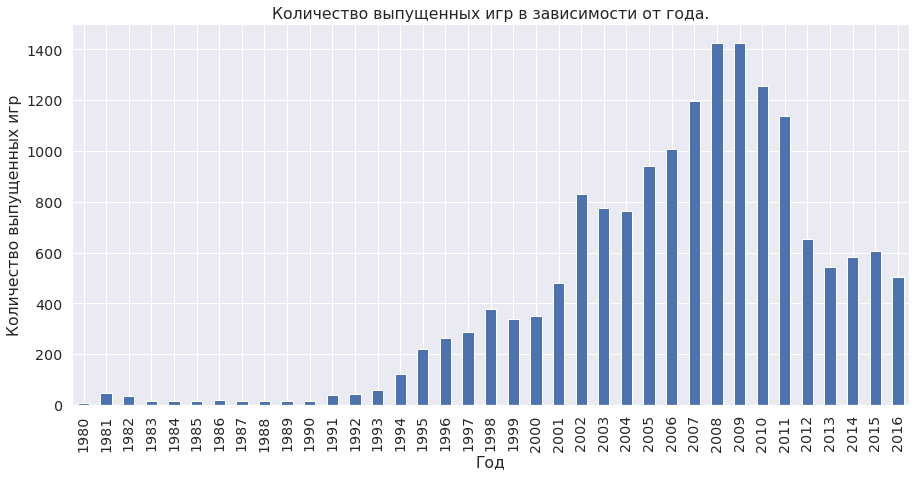

In [36]:
#установим размер для отображения всех последующих графиков, а так же размер шрифта осей и названия
sns.set(rc={'figure.figsize':(15,7)}, color_codes=True, font_scale=1.3)

df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(legend = False, kind='bar')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпущенных игр в зависимости от года.')
plt.show()

Из информации, полученной при построении графика по сводной таблице, можно заключить, что игровая индустрия начала активно развиваться ориентировчно с 1994 года, до этого периода количество создаваемых игр было незначительно.

In [37]:
#ограничим датасет, начиная с 1994
df = df[df['year_of_release']>=1994]

### 3.2 Анализ изменения продаж по платформам.

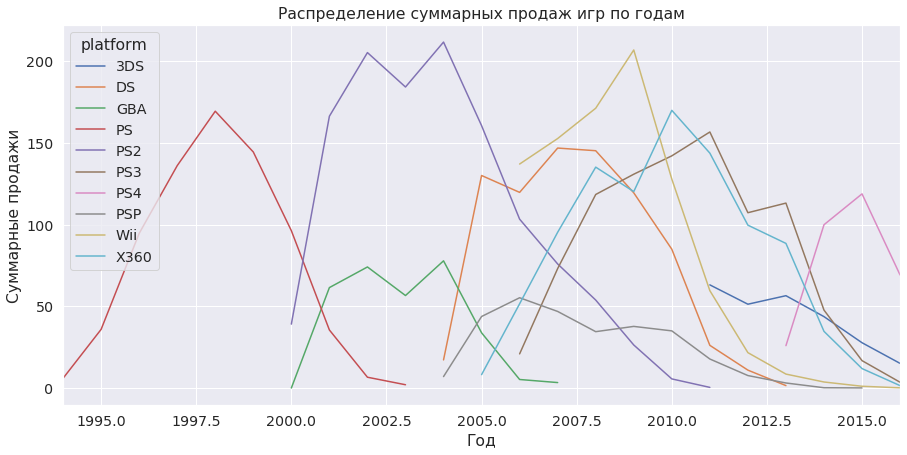

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


In [38]:
#выделим список плтформы по максимальным показателям продаж в мире и построим график по годам
platfom_sales = df.pivot_table(index = 'platform', values = 'world_sales', aggfunc = 'sum').sort_values(by = 'world_sales', ascending = False).head(10)
platfom_sales_list = list(platfom_sales.index)
df_top_platfors_all = df[(df['platform'].isin(platfom_sales_list))] 

#построим линейный график распрделения суммарных продаж по платформам по годам
df_top_pivot = df_top_platfors_all.pivot_table(index = 'year_of_release', values = 'world_sales', columns = 'platform', aggfunc = 'sum').plot()
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Распределение суммарных продаж игр по годам')
plt.show()
platfom_sales.head(5)

Если рассматривать период начиная с 1995 года, суммарно по количеству продаж лидирут следующие платформы: PS2, x360, PS4, Wii, DS. Как распрделеоно количество продаж в зависимсоти от года, можем увидеть нв графике. Очевидно, что ряд платформ  теряет актуланость, в дальнейшем исследовнии будем ориентироваться на более актулаьный период.

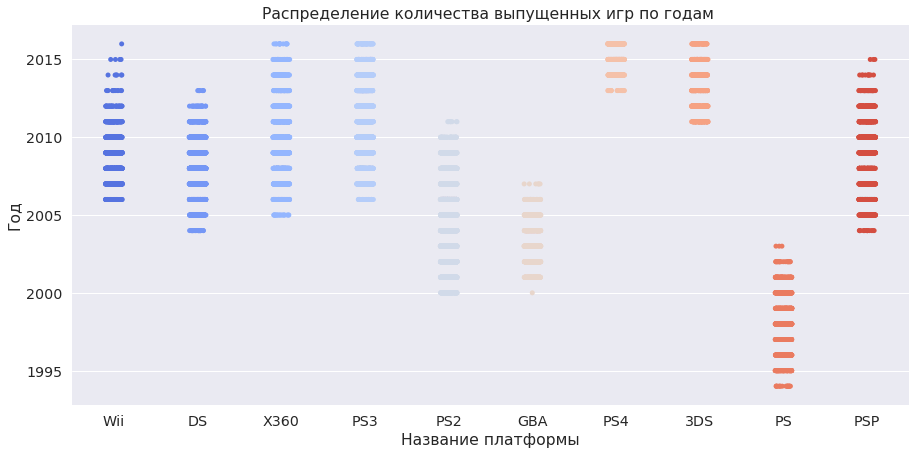

In [39]:
df_top_platfors_all['year_of_release'] = df_top_platfors_all['year_of_release'].astype('float64')
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
sns.stripplot(x="platform", y="year_of_release", data = df_top_platfors_all, dodge=True, alpha=1, zorder=10, palette = 'coolwarm')
plt.xlabel('Название платформы')
plt.ylabel('Год')
plt.title('Распределение количества выпущенных игр по годам ')
plt.show()

На данном типе графика отчетливо видно, в среднем платформы существуют ориентировочно 10 лет. Явное исключение - платформа PC.

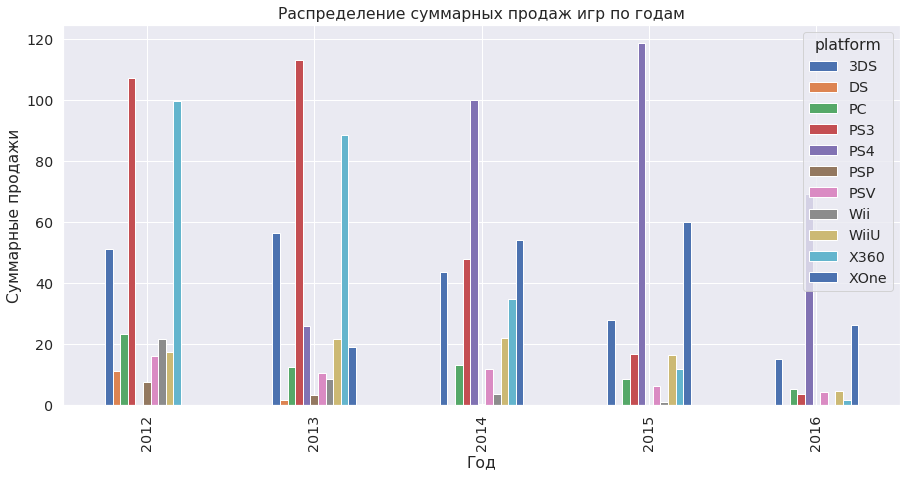

,world_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [40]:
#актуальным периодом будем считать показатели с 2012 года, т.к. по количеству проданных игр этот преиод характеризуется новым витком в продажах
df_actual = df[df['year_of_release']>=2012]

# построим распределение по годам по суммарным продажам для платформ за актуальный период
df_top_pivot_actual = df_actual.pivot_table(index = 'year_of_release', values = 'world_sales', columns = 'platform', aggfunc = 'sum')
df_top_pivot_actual.plot(kind = 'bar')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Распределение суммарных продаж игр по годам')
plt.show()


platfom_sales_actual_top = df_actual.pivot_table(index = 'platform', values = 'world_sales', aggfunc = 'sum').sort_values(by = 'world_sales', ascending = False).head(10)
platfom_sales_actual_top 

Исходя из графика распределения суммарных продаж за актуальный период можеи заключить, что наиболее перспективными платформами в последующие годы будут: PS4, XOne, 3DS

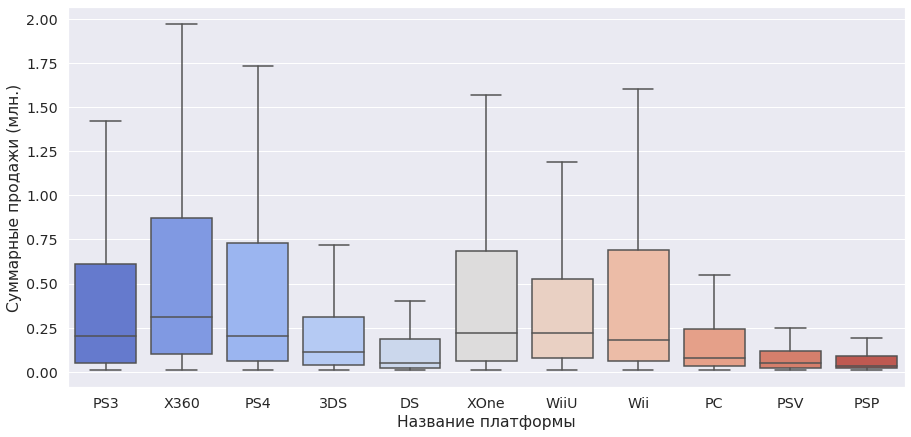

In [41]:
#для всех платформ за актуальный период построим график распределения
ax = sns.boxplot(x = 'platform', y = 'world_sales', data = df_actual, showfliers=False, palette = 'coolwarm')
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи (млн.)')
plt.show()

Из построенного графика boxplot можно проследить характер распределения количества продаж по платформам. Основные значения расположены в интервале 0.1 - 0.75 млн. продаж, 

### 3.3 Зависимость отзывов и количества продаж.

#### 3.3.1 Отзывы критиков.

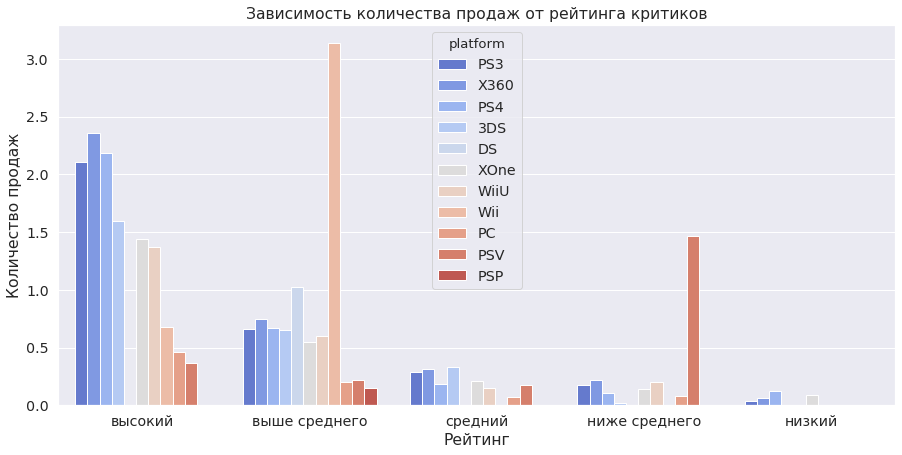

In [42]:
# прежде чем строить график категоризуем рейтинг
def cat(x):
    if x <= 20:
        return 'низкий'
    if x>=20 and x<=40:
        return 'ниже среднего'
    if x>=40 and x<=60:
        return 'средний'
    if x>=60 and x<=80:
        return 'выше среднего'
    if x>=80 and x<=100:
        return 'высокий'
    return'другое'

df['categorized_critic_score'] = df['critic_score'].apply(cat)
df_actual['categorized_critic_score'] = df['critic_score'].apply(cat)

sns.barplot(x = 'categorized_critic_score', y = 'world_sales', 
            hue = 'platform', data = df_actual, 
            ci = False, order =['высокий', 'выше среднего','средний','ниже среднего','низкий'], 
            palette = 'coolwarm')

plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.title('Зависимость количества продаж от рейтинга критиков')
plt.show()


Из график можем увидеть, что есть линейная зависимость между рейтингом критиков и количеством проданных копий. Резко выбивася из общей закономерности показатель по платформе DS, может быть связано с тем, что платформа представляет собой портативную консоль с катриджами, в связи с этой особенностью влияние рейтинга критиков не имело такой же сила, как на платформы, где игры выпускали на классических носителях.

#### 3.3.2 Отзывы пользователей.

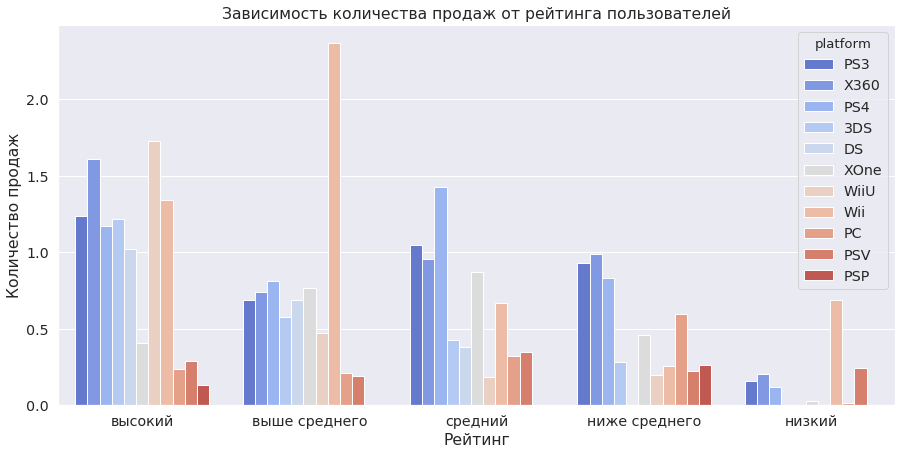

In [43]:
#категоризуем пользовательский рейтинг 
def cat1(x):
    if x <= 2:
        return 'низкий'
    if x>=2 and x<=4:
        return 'ниже среднего'
    if x>=4 and x<=6:
        return 'средний'
    if x>=6 and x<=8:
        return 'выше среднего'
    if x>=8 and x<=10:
        return 'высокий'
    return'другое'

df_actual['categorized_critic_user_score'] = df['user_score'].apply(cat1)
df['categorized_critic_user_score'] = df['user_score'].apply(cat)


sns.barplot(x = 'categorized_critic_user_score', 
            y = 'world_sales', hue = 'platform', 
            data = df_actual, ci = False, 
            order =['высокий', 'выше среднего','средний','ниже среднего','низкий'], 
            palette = 'coolwarm')

plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.title('Зависимость количества продаж от рейтинга пользователей')
plt.show()

В отличии от рейтинга критиков, пользовательский рейтинг не имеет такого же сильного влияния на количество продаж. Видим, что пизнак распределен более равномерно, явные препады в категориях 'ниже среднего' и 'низкий'.

### 3.5 Матрица корреляции

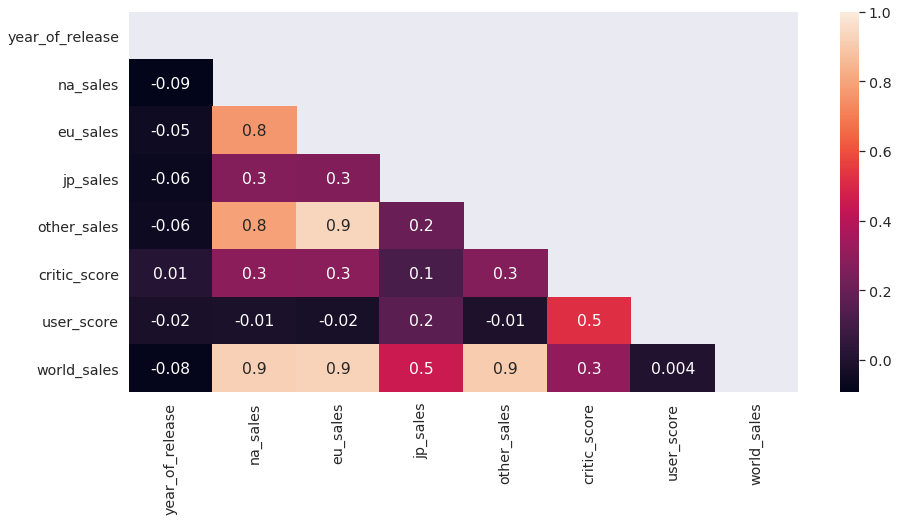

In [44]:
# построим тепловую карту корреляции
matrix = np.triu(df_actual.corr())
sns.heatmap(df_actual.corr(), annot = True, fmt='.1g', mask=matrix); 

Матрица корреляции  - дополнительно пдтвреждение в количественном выражении зависимотей между рассмотренными признаками.Из полученных данных видим достаточно большой коэффициент для рейтинга критиков - 0.3, и значительно меньший, для пользовательского рейтинга - 0.04.

### 3.6 Исследование влияния жанра.

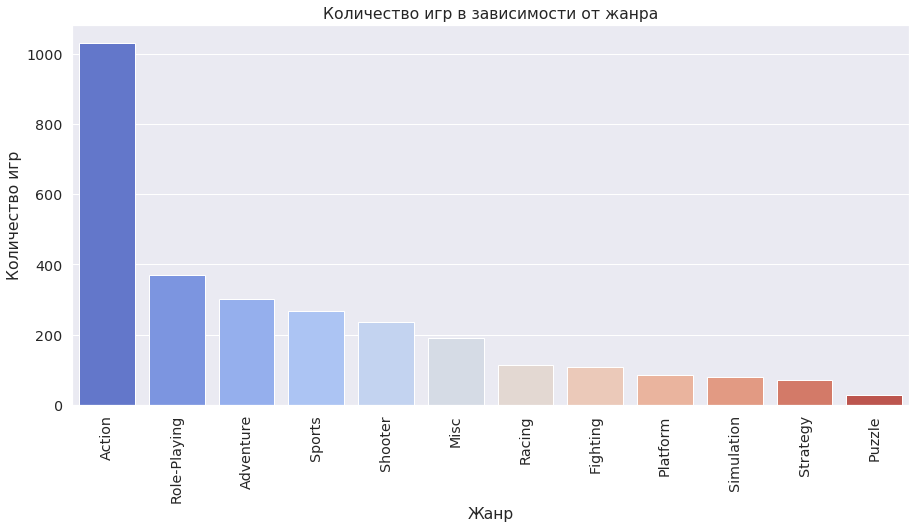

In [45]:
# Распределение игр по жанрам
#sns.distplot(x = df['genre'])
grouped_count = df_actual.groupby('genre')['name'].count().sort_values(ascending = False)
sns.barplot(x =grouped_count.index, y =grouped_count.values, palette = 'coolwarm')


plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.title('Количество игр в зависимости от жанра')
plt.xticks(rotation=90)
plt.show()


Из построенного графика видим, чnо самыми популярными у пользователей жанрами являются: Action, Role - Playing. Наименьшей популярность. пользуются игры в жанре puzzle. Такое распределение можно объяснить тем, что игры в жанрах action и Role - Playing, расчитаны на макисмально широкую аудиторию и представлены пожалуй на любыж платформах. 

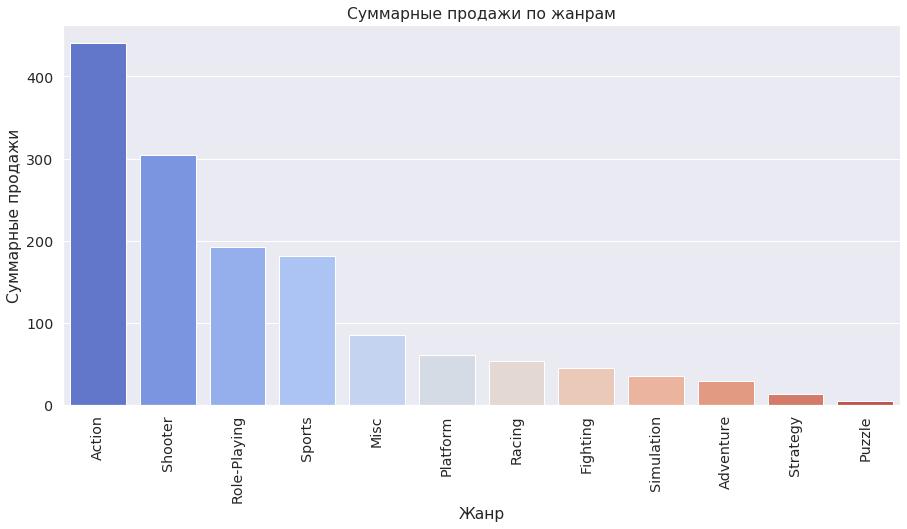

In [46]:
grouped_genre_sales = df_actual.groupby('genre')['world_sales'].sum().sort_values(ascending = False)
sns.barplot(x =grouped_genre_sales.index, y =grouped_genre_sales.values, palette = 'coolwarm')

plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи по жанрам')
plt.xticks(rotation=90)
plt.show()

По суммарным продажам в жанре лидером так же остается жанр -Action, однако на второе место смещается Shooter. Не смотря на то, что в данном жанре меньше суммарное количество игра, общие пролади значиельно выше, чем у других жанров.

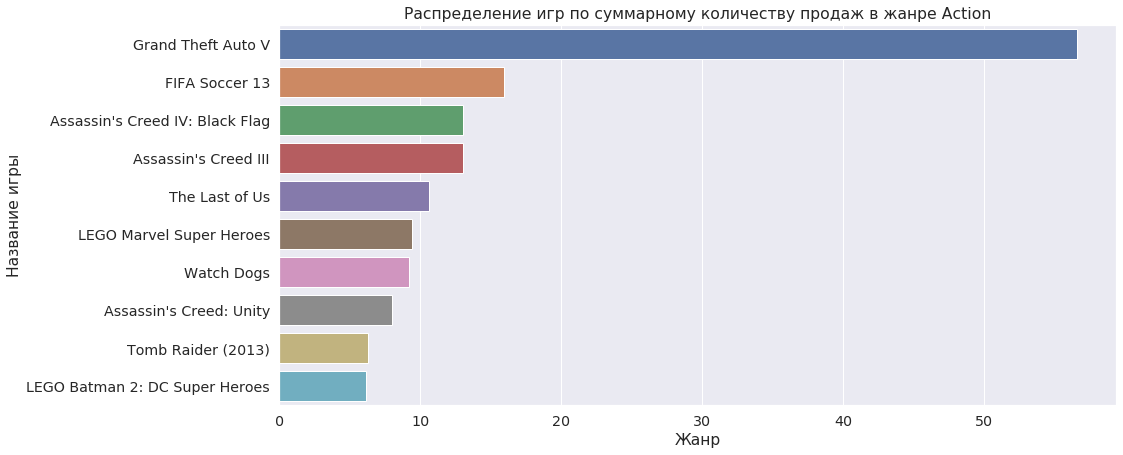

In [47]:
# более подробно исследоуем жанр 'Action'
df_action = df_actual[df_actual['genre'] == 'Action']

df_grouped = df_action.groupby('name')['world_sales'].sum().sort_values(ascending = False).head(10)

sns.barplot(y = df_grouped.index, x = df_grouped.values)

plt.xlabel('Жанр')
plt.ylabel('Название игры')
plt.title('Распределение игр по суммарному количеству продаж в жанре Action')
plt.show()

За актуальный период есть явный лидер в по количеству продаж в жанре  - GTA V, скорее всего так же будет пользоваться спросом и в последующие годы.


### 3.7. Зависимость количества продаж и платформы.

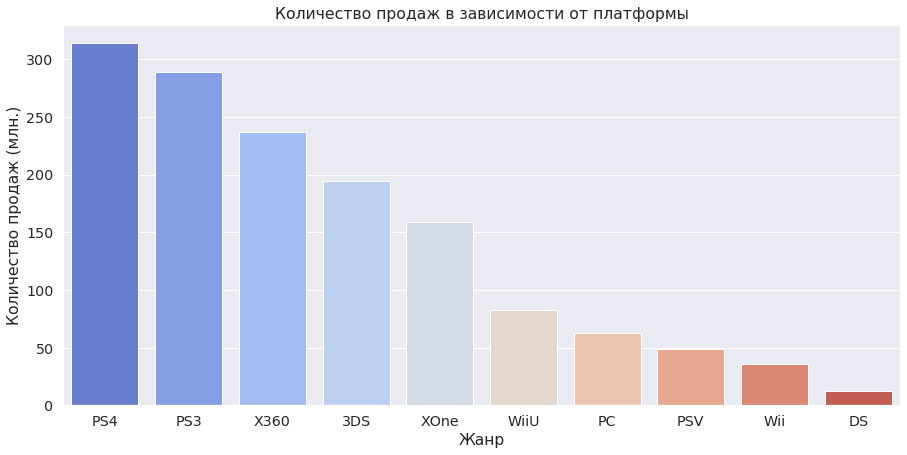

In [49]:
# проследим зависимость количесвта продаж и платформы, ограничим выборку 10 - ю топовыми платформами
grouped_table = df_actual.groupby('platform')['world_sales'].sum().sort_values(ascending = False).head(10)
sns.barplot(x =grouped_table.index, y =grouped_table.values, palette = 'coolwarm')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж (млн.)')
plt.title('Количество продаж в зависимости от платформы')
plt.show()



В зависимости от количесво продаж самыми популярными платформами являются PS4, X360, PS3. Связано прежде вчего с тем, что на консоли проблематично использовать неофициальные игры, в отличии от PC где, очевидно, основная масса установок игр не никак не фиксируется. 

### 3.8 Самые популярные игры.

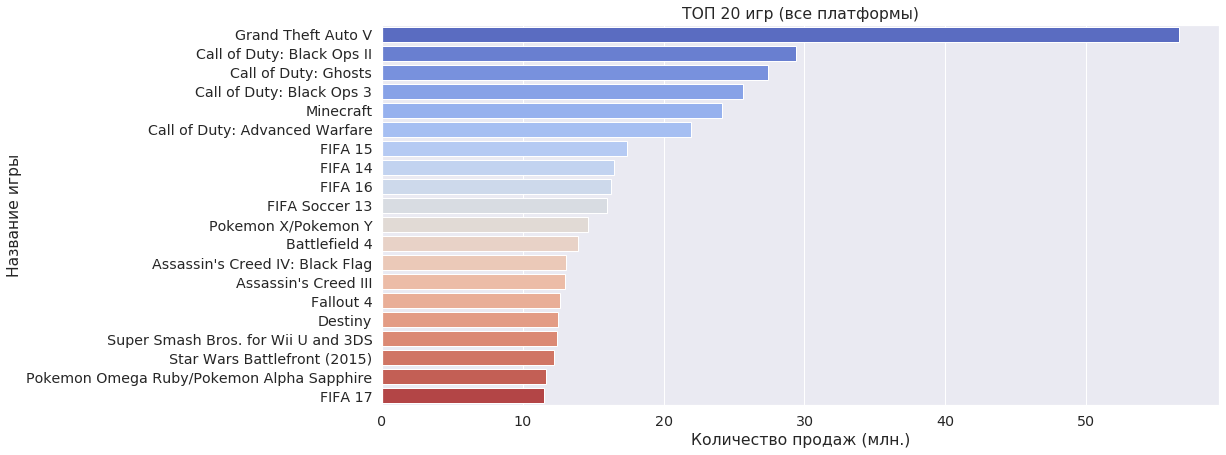

In [50]:
# ради интереса так же изучим топ 20 самых популярных игр
games = df_actual.groupby('name')['world_sales'].sum().sort_values(ascending = False).head(20)
sns.barplot(y = games.index, x = games.values, palette = 'coolwarm')
plt.ylabel('Название игры')
plt.xlabel('Количество продаж (млн.)')
plt.title('ТОП 20 игр (все платформы)')
plt.show()

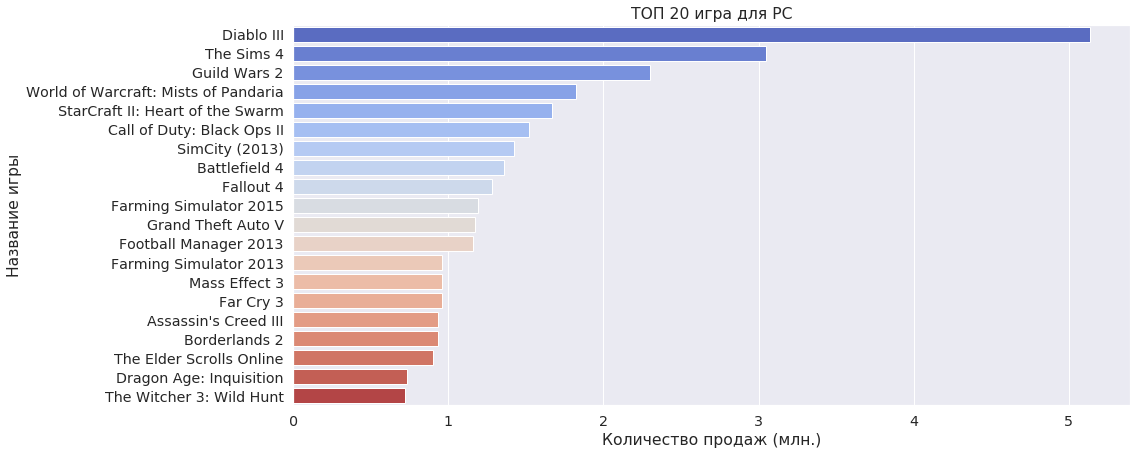

In [51]:
# так же посмоти на топ 20 самых популярных игра для PC

pc = df_actual[df_actual['platform']== 'PC']
games = pc.groupby('name')['world_sales'].sum().sort_values(ascending = False).head(20)
sns.barplot(y =games.index, x =games.values, palette = 'coolwarm')
plt.ylabel('Название игры')
plt.xlabel('Количество продаж (млн.)')
plt.title('ТОП 20 игра для PC')
plt.show()

## 4. Портреты пользователей для каждого региона

### 4.1. Определение популярной платформы по регионам

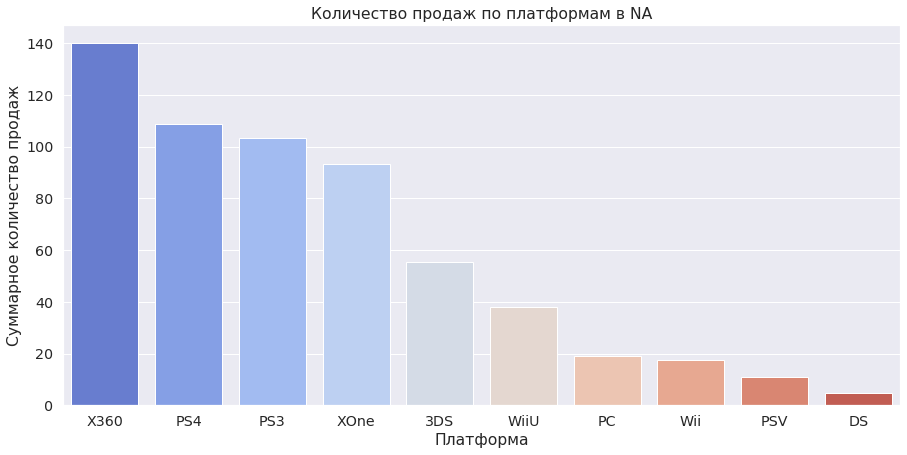

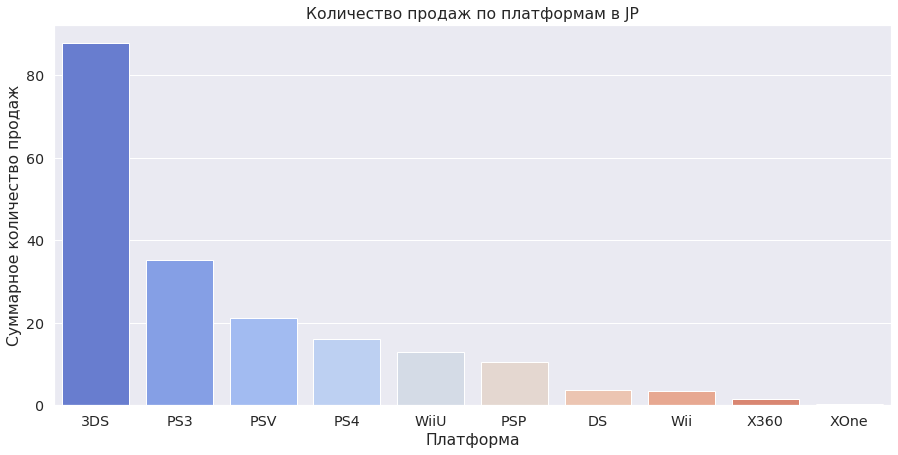

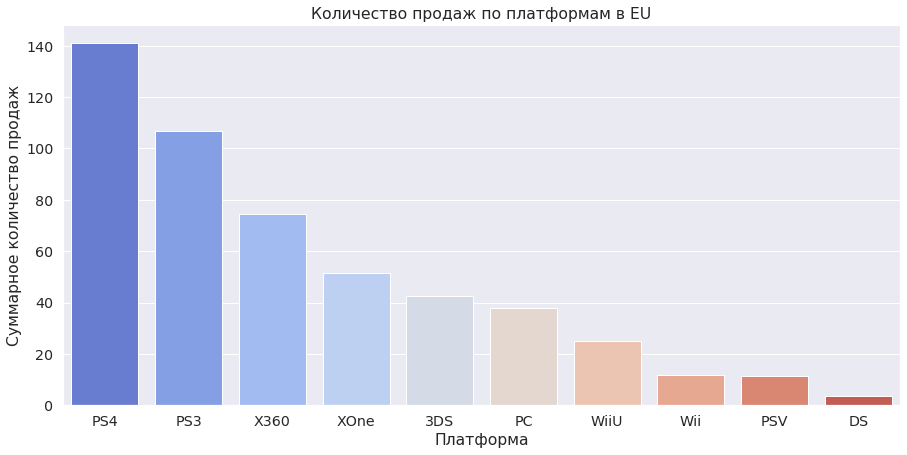

In [52]:
# построим в цикле графики зависимости количества продаж по платформам
df1 = 0
df2 = 0
df3 = 0
titles = ['Количество продаж по платформам в NA', 'Количество продаж по платформам в JP', 'Количество продаж по платформам в EU']
names_df = [df1, df2, df3]
columns1 =['na_sales', 'jp_sales', 'eu_sales']
for n in range(3):
    names_df[n] = df_actual.groupby('platform')[columns1[n]].sum().sort_values(ascending = False).head(10)
    sns.barplot(x = names_df[n].index, y = names_df[n].values, palette = 'coolwarm')
    plt.xlabel('Платформа')
    plt.ylabel('Суммарное количество продаж')
    plt.title(titles[n])
    plt.show()

Самыми популярными платформами по регионам являются:
* в Северной Америке X360, PS4, PS3
* в Японии 3DS, PS3, PSV
* в Европе PS4, PS3, X360



### 4.2. Зависимость количества продаж от жанра.

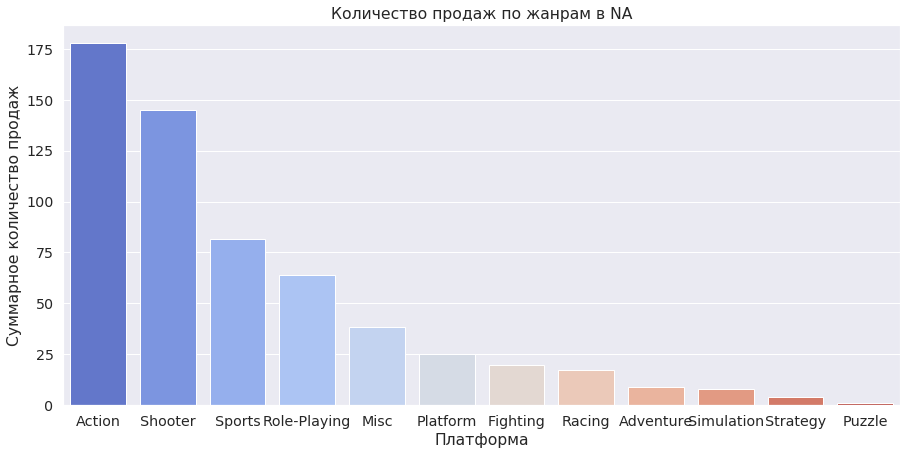

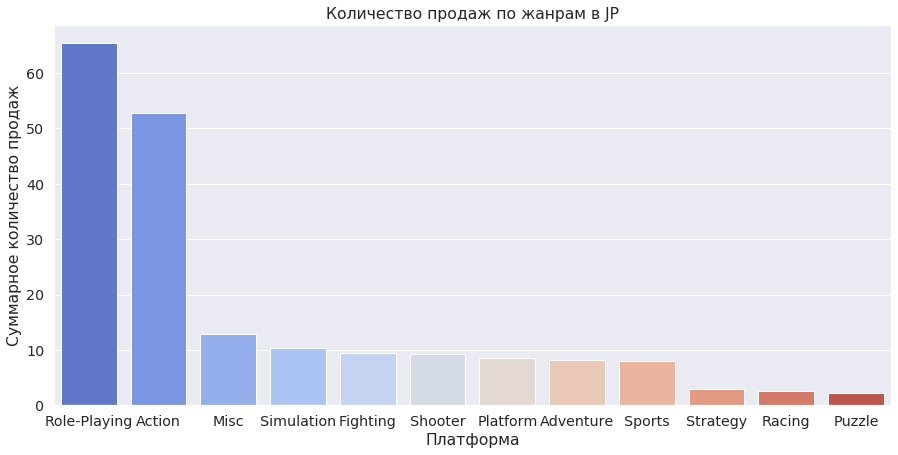

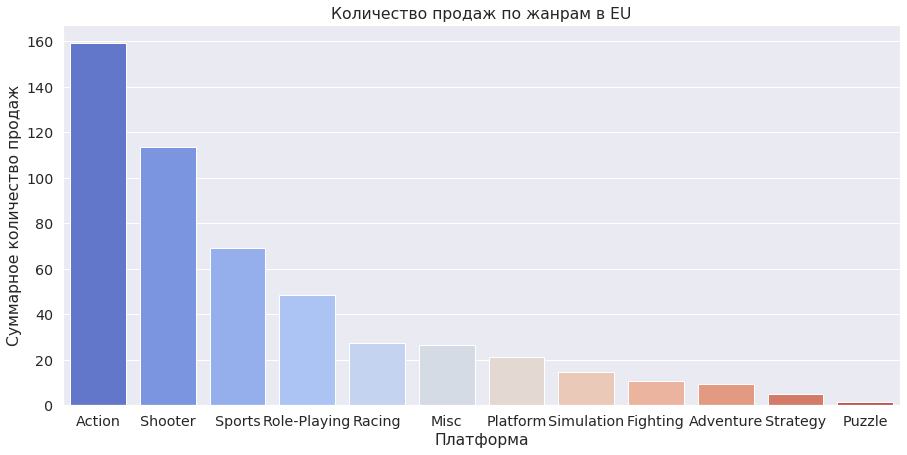

In [53]:
# применяем цикл аналогичный предыдущему
df1 = 0
df2 = 0
df3 = 0
titles = ['Количество продаж по жанрам в NA', 'Количество продаж по жанрам в JP', 'Количество продаж по жанрам в EU']
names_df = [df1, df2, df3]
columns1 =['na_sales', 'jp_sales', 'eu_sales']
for n in range(3):
    names_df[n] = df_actual.groupby('genre')[columns1[n]].sum().sort_values(ascending = False)
    sns.barplot(x = names_df[n].index, y = names_df[n].values, palette = 'coolwarm')
    plt.xlabel('Платформа')
    plt.ylabel('Суммарное количество продаж')
    plt.title(titles[n])
    plt.show()

Самыми популярными жанрами  в анализе по регионам являются: action, shooter. Интересно, что в Японии, в отличии от остальных регионов жанр Shooter не пользуется популярностью, а первенство возглавлеяет жанр ролевых игр, намного менее популярный в Европе и Северной Вмерике.

### 4.3 Зависимоть количества продаж от рейтинга критиков по регионам.

In [54]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales,categorized_critic_score,categorized_critic_user_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,выше среднего,низкий
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,высокий,низкий
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,выше среднего,низкий
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,другое,другое
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,высокий,низкий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,другое,другое
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,другое,другое
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,другое,другое
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,другое,другое


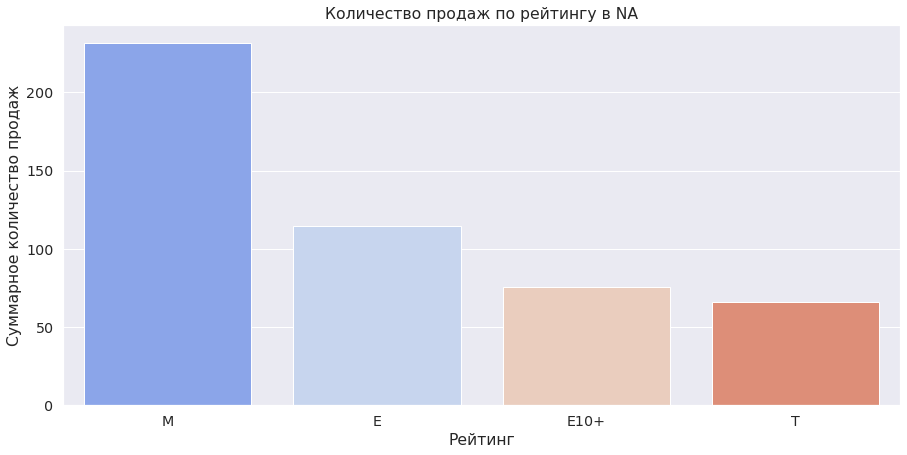

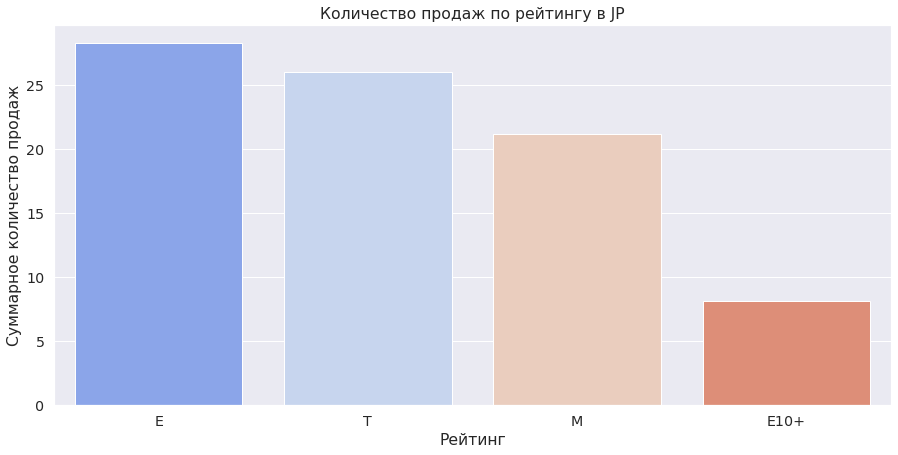

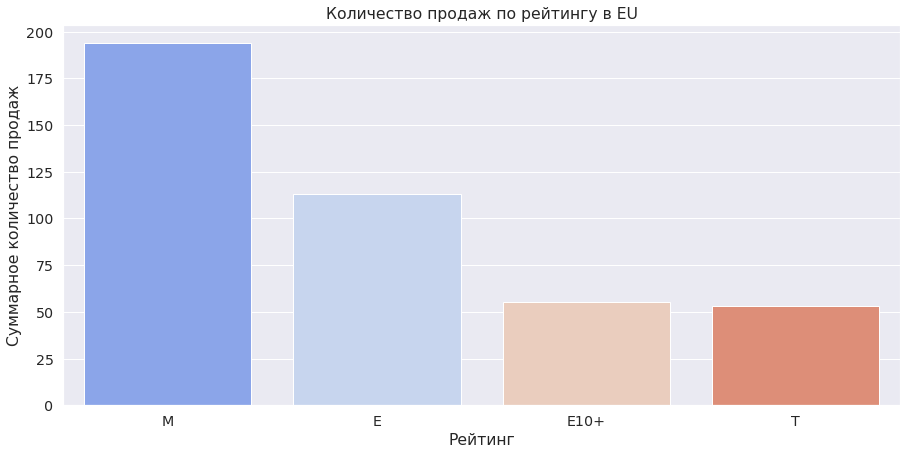

In [55]:
#зависимоть количества продаж от рейтингу
df1 = 0
df2 = 0
df3 = 0
titles = ['Количество продаж по рейтингу в NA', 'Количество продаж по рейтингу в JP', 'Количество продаж по рейтингу в EU']
names_df = [df1, df2, df3]
columns1 =['na_sales', 'jp_sales', 'eu_sales']
for n in range(3):
    names_df[n] = df_actual.groupby('rating')[columns1[n]].sum().sort_values(ascending = False)
    sns.barplot(x = names_df[n].index, y = names_df[n].values, palette = 'coolwarm')
    plt.xlabel('Рейтинг')
    plt.ylabel('Суммарное количество продаж')
    plt.title(titles[n])
    plt.show()


Из анализа графиков можем утверждать, что в Северной Америке игры с рейтингом - М (mature) - от 17 лет, имеют значительное преимущество в количестве проданных копий. Самое небольшое количеств приходится на категорию T (teen) - от 13 лет.
В Японии чаще продаются игры из категорий E (everyone) рекомендовано от 6 лет и T. Меньшая категоря - E10+ (от 10 лет).
Для европейских стран характерно примерно то же распределение, что и для Северной Америки.

## 5.Проверка гипотез.

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Нулева гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная - Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [56]:
#прежде чем переходить непосредственно к проверке гипотез необходимо выбрать корретный метод, для этого посчитаем и сравним дисперсии лвух выборок
PC_user_score = df_actual[df_actual['platform'] == 'PC']['user_score'].dropna().tolist()
Xbox_One_user_score = df_actual[df_actual['platform'] == 'XOne']['user_score'].dropna().tolist()

#  с помощью помощь. теста Левена определим равенство дисперсий
stat, p = levene(PC_user_score, Xbox_One_user_score)
p
print('{:.3f}'.format(p))

0.013


p< 0.05,  не можем рассматривать дисперсии как гомогенные, для проверки гипотезы применим t-критерий Уэлча.

In [57]:
#дисперсии не равны, поэтому так же используем параметр equal_var = False

alpha = 0.05

results = st.ttest_ind(
    PC_user_score,
    Xbox_One_user_score,
    equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


В результате проверки не получилось отвергнуть нулевую гипотезу, следовательно, можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC равны.

### 5.2 Средние пользовательские рейтинги жанров Action и Sports  разные.

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны.
Альтернативня гипотеза - Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [58]:
#прежде чем переходить непосредственно к проверке гипотез необходимо выбрать корретный метод, для этого посчитаем и сравним дисперсии лвух выборок
action_user_score = df_actual[df_actual['genre'] == 'Action']['user_score'].dropna().tolist()
sports_user_score = df_actual[df_actual['genre'] == 'Sports']['user_score'].dropna().tolist()

#  с помощью помощь. теста Левена определим равенство дисперсий
stat, p1 = levene(action_user_score, sports_user_score)
print('{:.7f}'.format(p1))

0.0000131


В данном случае дисперсии так же нельзя считать гомогенными, для проверки гипотезы будет использоваться t-критерий Уэлча, для этого укажем параметра equal_var = False

In [60]:
alpha = 0.05

results = st.ttest_ind(
    #PC_user_score,
    #Xbox_One_user_score,
    action_user_score,
    sports_user_score,
    equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


В данном случчает не получилось отвергнуть нулевую гипотезу о равенстве, поэтому заключаем, что средние пользовательские рейтинги жанров Action и Sports равны.

## 6. Общий вывод

В ходе исследования была проведена работа по предобработке, подготовке и анализу данных.
На первых этапах данные были очищены от ненужных пропусков, не влияющих на результаты исследования, типы были приобразованы приведены к нужному формату.

**В результате анализа удалось сделать следующие выводы:** 

* игровая индустрия начала активно развиваться начиная с 1994 года, как правило новая платформа сцществует около 10 лет, пика своей популярности достигая на середине пути.

* большое влияние на продаваемость игры оказывают оценки, в большей степени оценки критиков, в значительно меньшей, оценки пользователей. Коэффициенты корреляции - 0.5 против 0.004.

* аиболее популярными жанрами у пользователей по всему миру являются жанры: Action, Shooter.

* самыми полуярными платформами: PS4, X360, PS3. 

**В зависимости от исследуемого региона удалось обнаружить следующие закономерности:**

Самыми популярными платформами по регионам являются:
* в Северной Америке X360, PS4, PS3
* в Японии 3DS, PS3, PSV
* в Европе PS4, PS3, X360

Самыми популярными жанрами  в анализе по регионам являются: action, shooter. Интересно, что в Японии, в отличии от остальных регионов жанр Shooter не пользуется популярностью, а первенство возглавлеяет жанр ролевых игр, намного менее популярный в Европе и Северной Вмерике.

В Северной Америке игры с рейтингом - М (mature) - от 17 лет, имеют значительное преимущество в количестве проданных копий. Самое небольшое количеств приходится на категорию T (teen) - от 13 лет.
В Японии чаще продаются игры из категорий E (everyone) рекомендовано от 6 лет и T. Меньшая категоря - E10+ (от 10 лет).
Для европейских стран характерно примерно то же распределение, что и для Северной Америки.

Так же, в ходе **статистической проверки гипотез** было установлено, что:

* Средние пользовательские рейтинги платформ Xbox One и PC равны.
* Средние пользовательские рейтинги жанров Action и Sports равны.